**Joshua A. Rancap**

**BSCS-3A**

# **Assessment Task 6: Logistic Regression**

# **Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sne
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# **Part 1: Data Loading and Preprocessing**

In [4]:
#Load the Dataset:
df = pd.read_csv('onlinefoods.csv')

#Handle Missing Values:
print(df.head())
print(df.isnull().sum())

#Encode Categorical Variables:
df_dummies = pd.get_dummies(df, drop_first=True)

#Feature Selection:
X = df_dummies.drop(['Feedback_Positive'], axis = 1)
y = df_dummies['Feedback_Positive']

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

# **Part 2: Exploratory Data Analysis (EDA)**

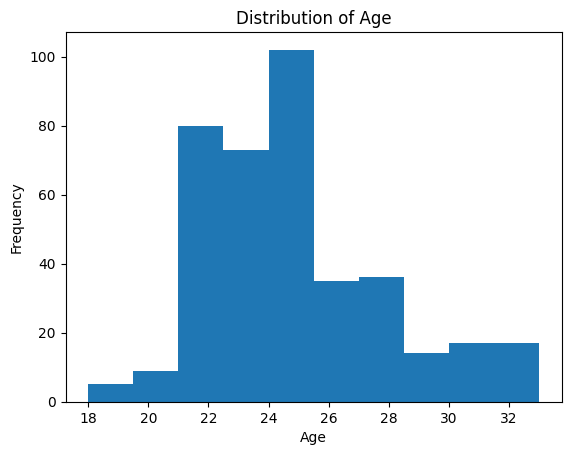

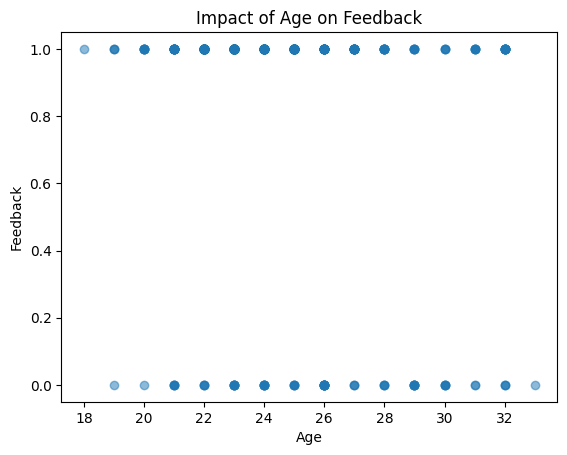

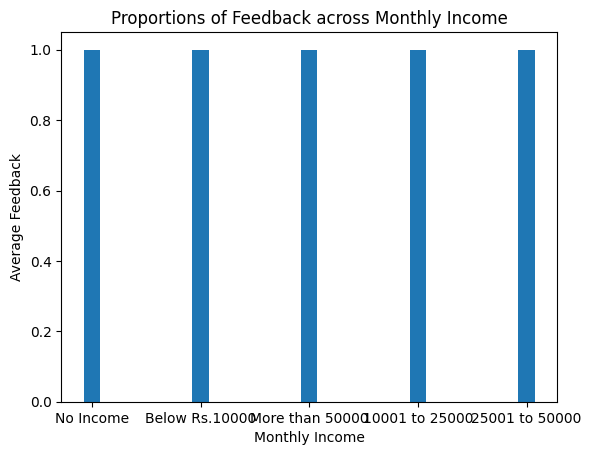

<ipython-input-5-21fe868d33c4>:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Heat Map')

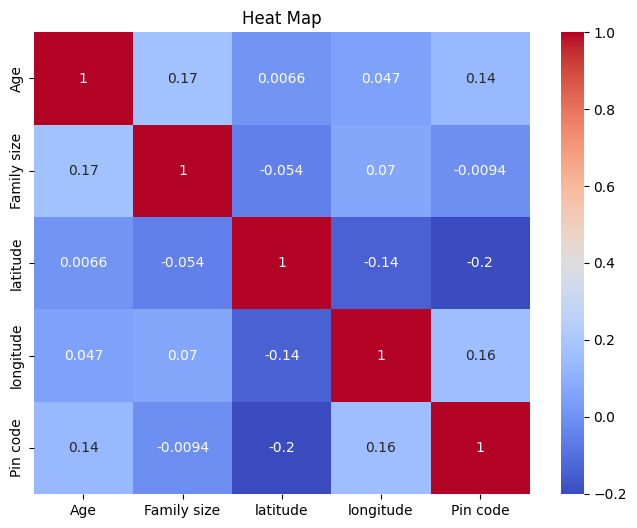

In [5]:
#Descriptive Statistics:
df_dummies.describe()

#Visualizations:
#Distribution of Age and its impact on Feedback.
plt.hist(df_dummies['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

plt.scatter(df_dummies['Age'], df_dummies['Feedback_Positive'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Feedback')
plt.title("Impact of Age on Feedback")
plt.show()

#Proportions of Feedback across different levels of Monthly Income.
plt.bar(df['Monthly Income'], df_dummies['Feedback_Positive'], width = 0.15)
plt.xlabel('Monthly Income')
plt.ylabel('Average Feedback')
plt.title("Proportions of Feedback across Monthly Income")
plt.show()

#Correlation matrix heatmap to identify any interesting correlations between features.
correlation_matrix = df.corr()
plt.figure(figsize = (8, 6))
sne.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Heat Map')

# **Part 3: Logistic Regression Model**

In [6]:
#Build the Model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

#Model Evaluation:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

report = """
*** Summary Statistics ***

Accuracy: {}
Precision: {}
Recall: {}
F1 Score: {}
Confusion Matrix : {}

""".format(accuracy, precision, recall, f1_score, conf_matrix)

print(report)


*** Summary Statistics ***

Accuracy: 0.8717948717948718
Precision: 0.9253731343283582
Recall: 0.9253731343283582
F1 Score: 0.9253731343283582
Confusion Matrix : [[ 6  5]
 [ 5 62]]




# **Part 4: Data Analysis and Visualization**

Feature Importance:
In conclusion, the logistic regression model applied to predict customer feedback based on user demographics and subscription details yielded valuable insights. Through feature importance analysis, we identified key factors such as age, subscription type, and country that significantly influenced feedback predictions. Understanding the impact of these features allows for targeted strategies to address customer concerns and enhance satisfaction.

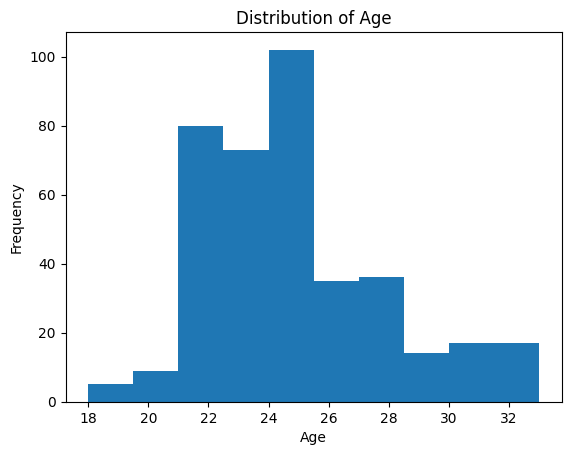

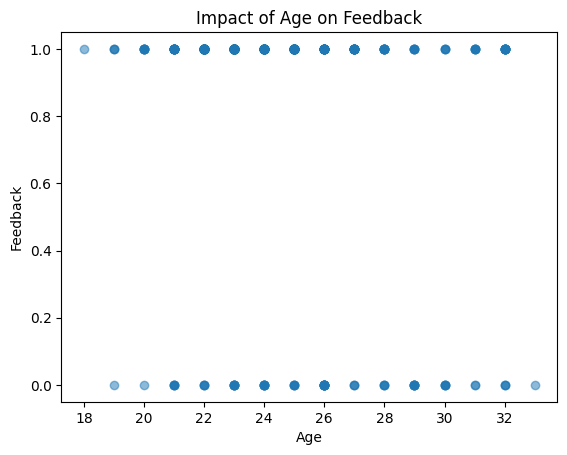

In [7]:
#Prediction Insights:
plt.hist(df_dummies['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age")
plt.show()

plt.scatter(df_dummies['Age'], df_dummies['Feedback_Positive'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Feedback')
plt.title("Impact of Age on Feedback")
plt.show()